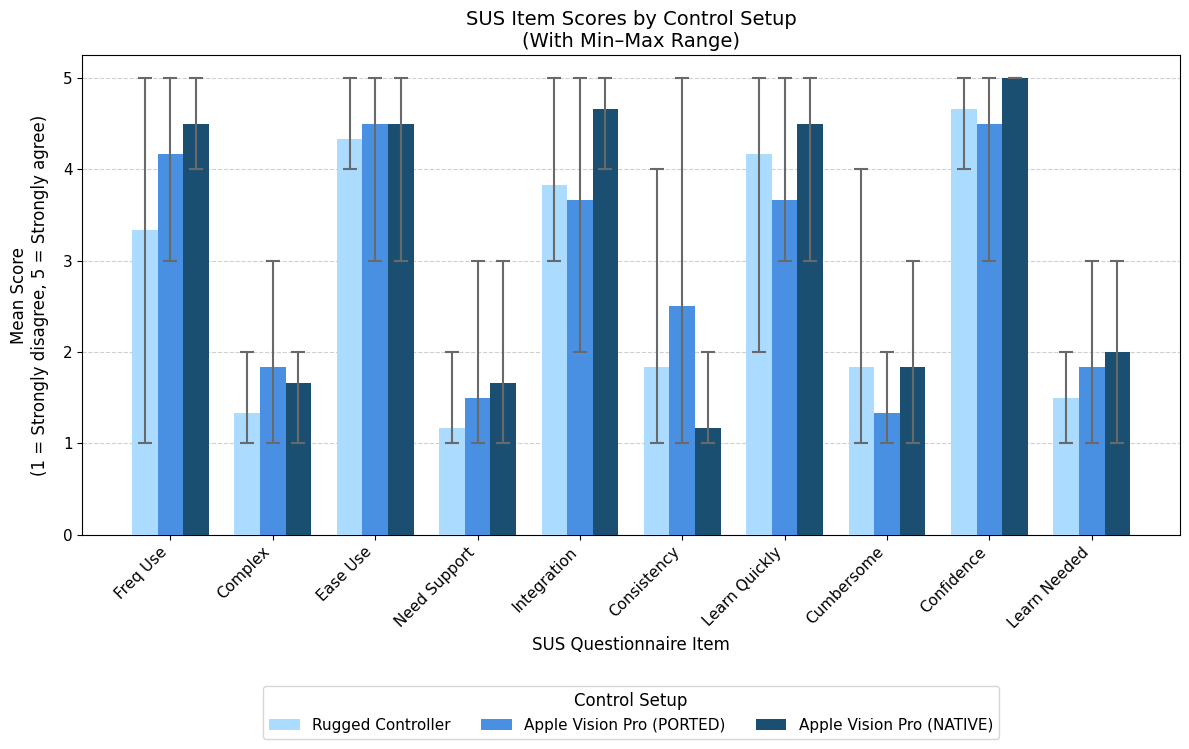

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load SUS item data
df = pd.read_csv('sus.csv', sep=';', encoding='latin1', decimal=',')

# Identify SUS item columns
exclude = [
    '$submission_id', '$created', 'First name', 'Control Setup',
    '$answer_time_ms', 'Odd item sum', 'Even item sum', 'SUS SCORE'
]
item_cols = [c for c in df.columns if c not in exclude]

# Convert to numeric
for col in item_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Compute stats
grouped   = df.groupby('Control Setup')[item_cols]
setups    = ['Rugged Controller', 'Apple Vision Pro (PORTED)', 'Apple Vision Pro (NATIVE)']
mean_vals = grouped.mean().loc[setups]
min_vals  = grouped.min().loc[setups]
max_vals  = grouped.max().loc[setups]

# --- Define your exact colors here ---
colors = {
    'Rugged Controller':        '#ABDBFF',
    'Apple Vision Pro (PORTED)': '#4A90E2',
    'Apple Vision Pro (NATIVE)': '#1B4F72'
}


fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(item_cols))
width = 0.25

for i, setup in enumerate(setups):
    pos    = x + (i-1)*width
    means  = mean_vals.loc[setup]
    lowers = means - min_vals.loc[setup]
    uppers = max_vals.loc[setup] - means

    ax.bar(
        pos,
        means,
        width,
        color=colors[setup],
        label=setup,
        zorder=3                # bars on top
    )
    ax.errorbar(
        pos,
        means,
        yerr=[lowers, uppers],
        fmt='none',
        ecolor='dimgray',
        capsize=5,
        elinewidth=1.5,
        capthick=1.5,
        zorder=3                # error bars on top
    )

plt.xlabel('SUS Questionnaire Item', fontsize=12)
plt.ylabel('Mean Score\n(1 = Strongly disagree, 5 = Strongly agree)', fontsize=12, labelpad=10)
plt.title('SUS Item Scores by Control Setup\n(With Min–Max Range)', fontsize=14)
plt.xticks(x, [
    'Freq Use','Complex','Ease Use','Need Support','Integration',
    'Consistency','Learn Quickly','Cumbersome','Confidence','Learn Needed'
], rotation=45, ha='right', fontsize=11)
plt.yticks([0, 1,2,3,4,5], fontsize=11)

# --- Move legend below the plot ---
plt.legend(
    title='Control Setup',
    ncol=3,                                 # spread across three columns
    loc='upper center',                     # anchor point
    bbox_to_anchor=(0.5, -0.30),            # (x, y) in axis coords
    fontsize=11,
    title_fontsize=12
)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)
plt.show()


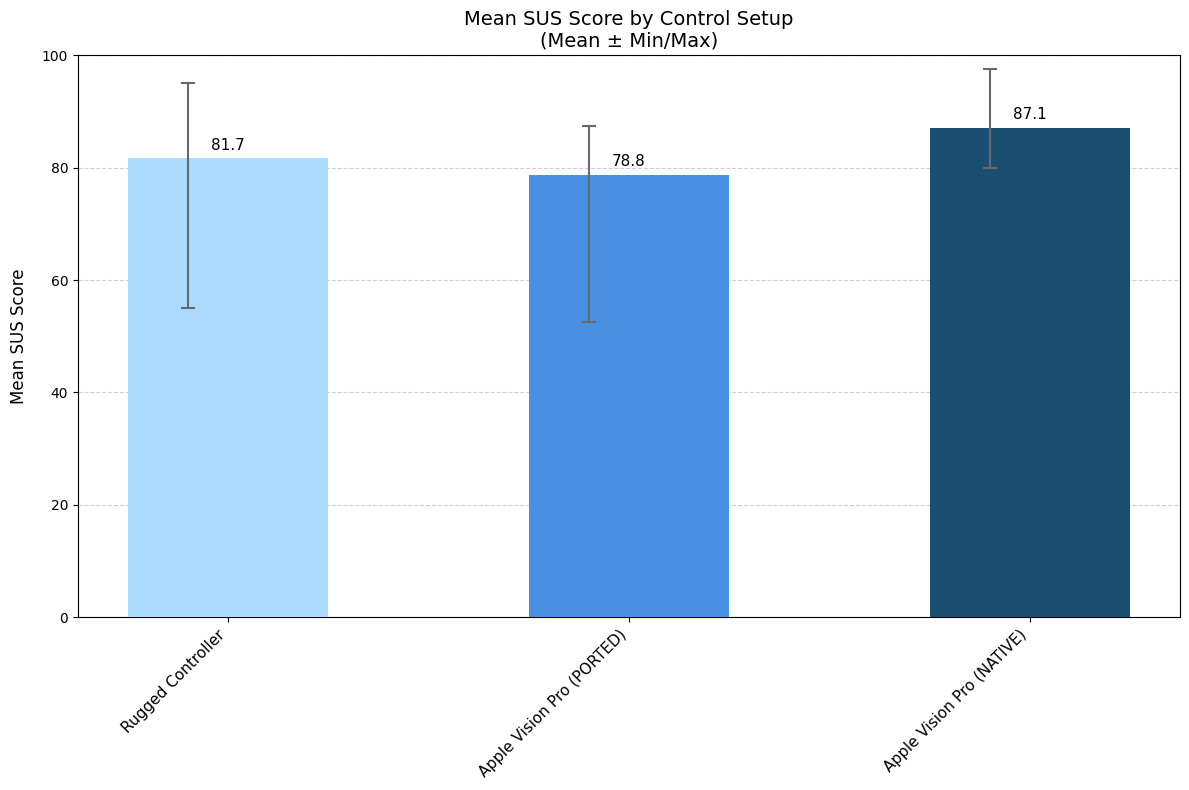

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ——— Load SUS data ———
df = pd.read_csv('sus.csv', sep=';', encoding='latin1', decimal=','   )

# ——— Ensure SUS SCORE is numeric ———
df['SUS SCORE'] = pd.to_numeric(df['SUS SCORE'], errors='coerce')

# ——— Compute per-setup stats on the overall SUS SCORE ———
group = df.groupby('Control Setup')['SUS SCORE']
setups = ['Rugged Controller', 'Apple Vision Pro (PORTED)', 'Apple Vision Pro (NATIVE)']

mean_scores = group.mean().loc[setups]
min_scores  = group.min().loc[setups]
max_scores  = group.max().loc[setups]

low_err  = mean_scores - min_scores
high_err = max_scores - mean_scores

# ——— Define your colors ———
colors = {
    'Rugged Controller':        '#ABDBFF',
    'Apple Vision Pro (PORTED)': '#4A90E2',
    'Apple Vision Pro (NATIVE)': '#1B4F72'
}

# ——— Plot ———
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_axisbelow(True)

x = np.arange(len(setups))
bar_colors = [colors[s] for s in setups]

bars = ax.bar(
    x,
    mean_scores.values,
    color=bar_colors,
    zorder=3,
    width=0.5
)
ax.bar_label(
    bars,
    labels=[f"{v:.1f}" for v in mean_scores.values],
    padding=4,
    fontsize=11,
)
ax.errorbar(
    x-0.1,
    mean_scores.values,
    yerr=[low_err.values, high_err.values],
    fmt='none',
    ecolor='dimgray',
    capsize=5,
    elinewidth=1.5,
    capthick=1.5,
    zorder=3
)

# ——— Labels & styling ———
ax.set_xticks(x)
ax.set_xticklabels(setups, rotation=45, ha='right', fontsize=11)
ax.set_ylabel('Mean SUS Score', fontsize=12, labelpad=10)
ax.set_title('Mean SUS Score by Control Setup\n(Mean ± Min/Max)', fontsize=14)
ax.set_ylim(0, 100)  # SUS scores go from 0 to 100

# ——— Grid behind bars ———
ax.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)

plt.tight_layout()
plt.show()


In [12]:
df = pd.read_csv('sus.csv', sep=';', encoding='latin1')

# ——— Fix European decimals and make numeric ———
df['SUS SCORE'] = (
    df['SUS SCORE']
      .astype(str)
      .str.replace(',', '.', regex=False)     # 81,66666667 → 81.66666667
      .pipe(pd.to_numeric, errors='coerce')  # now converts correctly
)

# ——— Compute per-setup stats ———
group      = df.groupby('Control Setup')['SUS SCORE']
setups     = ['Rugged Controller',
              'Apple Vision Pro (PORTED)',
              'Apple Vision Pro (NATIVE)']

mean_scores = group.mean().loc[setups]
min_scores  = group.min().loc[setups]
max_scores  = group.max().loc[setups]

print(mean_scores)

Control Setup
Rugged Controller            81.666667
Apple Vision Pro (PORTED)    78.750000
Apple Vision Pro (NATIVE)    87.083333
Name: SUS SCORE, dtype: float64
